In [2]:
import blocksci

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
sns.set_theme(context="notebook", style="ticks")

In [5]:
import collections
import random

In [6]:
import utils

In [7]:
from collections import Counter

In [8]:
chain = blocksci.Blockchain(utils.blocksci_config())

In [9]:
my_cm = blocksci.cluster.ClusterManager(utils.latest_clustering(), chain)

### Heuristics

##### Cluster membership heuristic (returns change known from cluster membership)

In [10]:
cluster_member = blocksci.heuristics.change.cluster_member(my_cm)

##### Address reuse (returns change from direct address reuse)

In [11]:
address_reuse = blocksci.heuristics.change.address_reuse

#### Previously chosen ground truth transactions

In [12]:
gt = blocksci.GroundTruth(utils.latest_groundtruth(), chain)

In [13]:
gt.transactions().size

35257428

In [14]:
cluster_id = blocksci.heuristics.cluster_id(my_cm)

In [15]:
%time cluster_ids = gt.transactions().map(lambda tx: cluster_id(tx))

CPU times: user 13.6 s, sys: 3.69 s, total: 17.3 s
Wall time: 17.2 s


In [16]:
len(set(cluster_ids))

3580558

In [15]:
cluster_counts = Counter(cluster_ids)

In [16]:
cluster_counts.most_common(10)

[(34508, 3485257),
 (159191, 383519),
 (61817017, 371713),
 (23594133, 315739),
 (135574604, 239094),
 (109995066, 202243),
 (20988006, 197539),
 (23084303, 169299),
 (12503851, 141897),
 (40523343, 141489)]

In [17]:
my_cm.clusters()[34508].tx_count

8851845

In [17]:
cluster_occurrences = list(Counter(cluster_counts.values()).items())

In [18]:
x, y = map(list, zip(*cluster_occurrences))

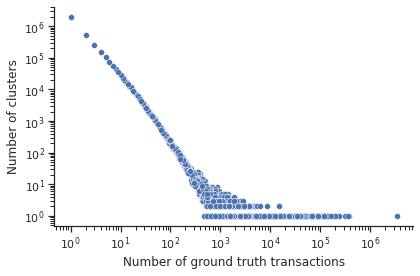

In [19]:
ax = sns.scatterplot(x=x, y=y)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel("Number of clusters")
ax.set_xlabel("Number of ground truth transactions")
#ax.set_title("Transactions per cluster in ground truth")
sns.despine()
plt.tight_layout()
plt.savefig("figures/txes-clusters-gt.pdf")

In [20]:
min_xlim = ax.get_xlim()[0]

### Unique clusters and their tx counts

In [21]:
unique_clusterids = sorted(set(cluster_ids))

In [22]:
len(unique_clusterids)

3580558

In [23]:
tx_counts = {}
address_counts = {}
for cid in unique_clusterids:
    cluster = my_cm.clusters()[cid]
    tx_counts[cid] = cluster.tx_count
    address_counts[cid] = len(cluster)

In [24]:
sum(tx_counts.values())

142568448

In [25]:
address_dist = list(Counter(address_counts.values()).items())

In [26]:
x2, y2 = map(list, zip(*address_dist))

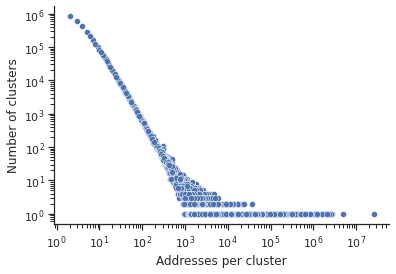

In [27]:
ax = sns.scatterplot(x=x2, y=y2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel("Number of clusters")
ax.set_xlabel("Addresses per cluster")
ax.set_title("")
sns.despine()

In [28]:
tx_dist = list(Counter(tx_counts.values()).items())

In [29]:
x3, y3 = map(list, zip(*tx_dist))

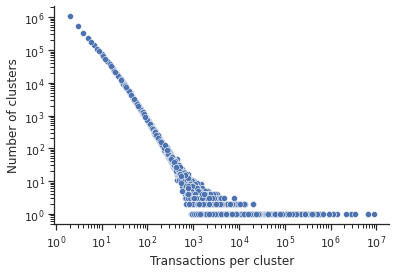

In [30]:
ax = sns.scatterplot(x=x3, y=y3)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel("Number of clusters")
ax.set_xlabel("Transactions per cluster")
ax.set_title("")
sns.despine()

### Global clusters and their tx counts

In [31]:
global_tx_counts = collections.defaultdict(int)
global_address_counts = collections.defaultdict(int)
for cluster in my_cm.clusters():
    global_tx_counts[cluster.tx_count] += 1 
    global_address_counts[len(cluster)] += 1 

In [32]:
global_address_dist = list(global_address_counts.items())

In [33]:
x4, y4 = map(list, zip(*global_address_dist))

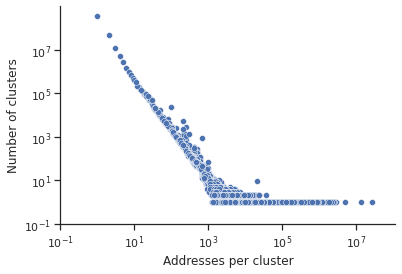

In [34]:
ax = sns.scatterplot(x=x4, y=y4)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel("Number of clusters")
ax.set_xlabel("Addresses per cluster")
ax.set_xlim(.1)
ax.set_ylim(.1)
ax.set_title("")
sns.despine()

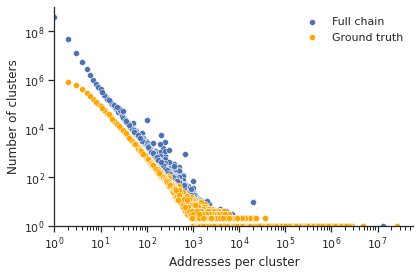

In [35]:
ax = sns.scatterplot(x=x4, y=y4)
sns.scatterplot(x=x2, y=y2, color="orange", ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1)
ax.set_ylim(1)
ax.set_ylabel("Number of clusters")
ax.set_xlabel("Addresses per cluster")
ax.set_title("")
ax.legend(labels=["Full chain","Ground truth"], frameon=False)
sns.despine()
plt.tight_layout()
plt.savefig("figures/cluster-size-distribution.pdf")

In [36]:
df_gt = pd.DataFrame({"addresses": x2, "gt_count": y2})

In [37]:
df_full = pd.DataFrame({"addresses": x4, "full_count": y4})

In [38]:
df_combined = df_gt.merge(df_full, how="outer", on="addresses")

In [39]:
df_combined = df_combined.fillna(0)

In [40]:
df_combined = df_combined.sort_values(['addresses'])

In [41]:
global_tx_dist = list(global_tx_counts.items())

In [42]:
x5, y5 = map(list, zip(*global_tx_dist))

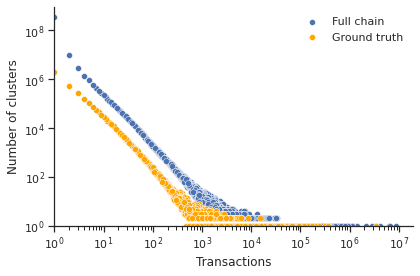

In [43]:
ax = sns.scatterplot(x=x5, y=y5)
sns.scatterplot(x=x, y=y, color="orange", ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1)
ax.set_ylim(1)
ax.set_ylabel("Number of clusters")
ax.set_xlabel("Transactions")
ax.legend(labels=["Full chain","Ground truth"], frameon=False)
ax.set_title("")
sns.despine()
plt.tight_layout()
plt.savefig("figures/cluster-tx-distribution.pdf")